In [13]:
#import data
import os
for filename in os.listdir(os.getcwd()+'/input'):
    points = []
    with open('input/'+filename, 'r') as f:
        inpt = f.readlines()
        for point in inpt[1:]:
            point = point.split(' ')
            points.append(((int(point[0])),(int(point[1]))))

SEPARATING POINTS BY AXIS-PARALLEL LINES

Think about the points given as vertices of a graph. Imagine that when there are no lines drawn, no points are separated from each other. The graph is fully connected.

The figure below represents the example input as a fully connected graph

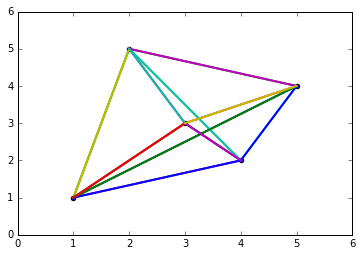

In [148]:
plot(points,make_graph(points),[],[])

When a vertical line is drawn between the points, the connections between the points to the left of the line and right (or top and bottom if horizontal) of the line are broken. When there are no edges in the graph, each point is fully separated from its neighbors. See example below:

First separation


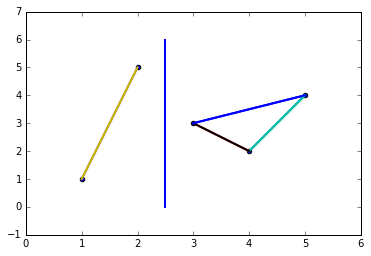

Second separation


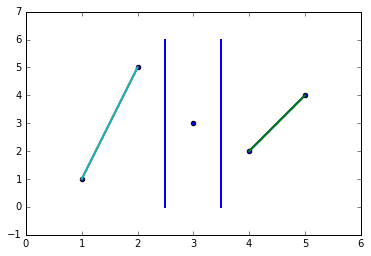

Third separation


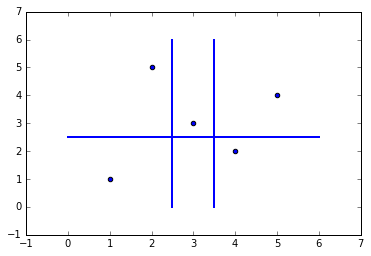

In [152]:
#my x and y axes are flipped -- pls forgive!

print("First separation")
graph = make_graph(points)
draw(graph, 2.5, 0)
plot(points,graph,[2.5],[])

print("Second separation")
draw(graph, 3.5, 0)
plot(points,graph,[2.5,3.5],[])

print("Third separation")
draw(graph, 2.5, 1)
plot(points,graph,[2.5,3.5],[2.5])

There's a lot of ways to draw the lines. In the prof's paper, he said that the optimal number of lines to draw is 2*sqrt(n)-2 (n=number of points). 

My algorithm (local solution) does this:
1. Gets all vertical lines that can be drawn between the leftmost point and rightmost point and all horizontal lines that can be drawn between the topmost point and bottommost point
2. Initializes the graph representation shown above
3. Calculates the number of lines drawn in an optimal solution
4. For every order/combination of horizontal and vertical lines to be drawn
    While the graph is still connected at any point:
        draw a line (alternate vertical and horizontal)
        update graph
    if the number of lines drawn is less than or equal to the optimal number:
        return the current lines drawn
    if the number of lines drawn is greater than optimal, but still better than anything we have seen:
        update the best_lines_drawn variables
5. If you never get an optimal solution, return the best one you found.

In [116]:
#helper functions
import copy
import itertools

#get all permutations of a list of possible lines
def get_permutations(lines):
    return itertools.permutations(lines)

#make a list of possible lines (range function that takes floats)
def drange(x, y, jump):
    r=[]
    while x < y:
        r.append(float(x))
        x += jump
    return r

#create lists of possible points (min x to max x, min y to max y)
def get_all_possible(points):
    x_sort = sorted(points, key=lambda x: x[0])
    y_sort = sorted(points, key=lambda x: x[1])
    x_min = x_sort[0][0]
    x_max = x_sort[-1][0]
    y_min = y_sort[0][1]
    y_max = y_sort[-1][1]
    
    return (drange(x_min+.5,x_max+.5,1), drange(y_min+.5,y_max+.5,1))

#make a graph of all possible graph points
def make_graph(points):
    initial_graph = dict.fromkeys(points)
    for point in initial_graph.keys():
        c_copy = copy.copy(points)
        c_copy.remove(point)
        initial_graph[point] = c_copy
    return initial_graph

#draw a new parallel line to separate points
def draw(graph, line, idx):
    left = []
    right = []
    #mark points left and right (or above and below) the line to be drawn
    for point in graph.keys():
        if point[idx]<line:
            left.append(point)
        if point[idx]>line:
            right.append(point)
    #separate the points
    for point in graph.keys():
        if point in left:
            for p2 in right:
                if p2 in graph[point]:
                    graph[point].remove(p2)
        if point in right:
            for p2 in left:
                if p2 in graph[point]:
                    graph[point].remove(p2)
    return graph

def nodes_left(graph):
    for point in graph.keys():
        if graph[point]!=[]:
            return True
    return False

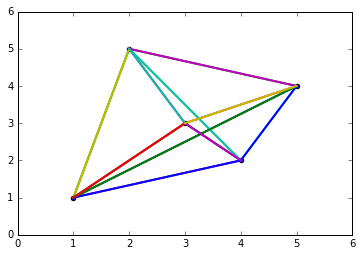

In [153]:
import math

def segment(points):
    all_x_lines,all_y_lines = get_all_possible(points)
    graph = make_graph(points)
    OPT = math.ceil(math.sqrt(len(points))*2)-2
    best = len(points)
    best_x_drawn = None
    best_y_drawn = None
    plot(points,graph,[],[])
    for x_lines_perm in get_permutations(all_x_lines):
        for y_lines_perm in get_permutations(all_y_lines):
            graph = make_graph(points)
            #print(x_lines_perm, y_lines_perm)
            total_lines_drawn = 0
            x_lines_drawn = []
            y_lines_drawn = []
            idx = 0
            look_at_x = True
            while nodes_left(graph):
                if look_at_x:
                    x_line = x_lines_perm[idx]
                    graph = draw(graph, x_line, 0)
                    x_lines_drawn.append(x_line)
                    look_at_x = False
                else:
                    y_line = y_lines_perm[idx]
                    graph = draw(graph, y_line, 1)
                    y_lines_drawn.append(y_line)
                    look_at_x = True
                    idx+=1
                total_lines_drawn+=1
            
            if total_lines_drawn<=OPT:
                #plot(points,graph,x_lines_drawn,y_lines_drawn)
                return (graph,x_lines_drawn,y_lines_drawn)
            if total_lines_drawn<best:
                best = total_lines_drawn
                best_x_drawn = x_lines_drawn
                best_y_drawn = y_lines_drawn           
    
    return(graph,best_x_drawn,best_y_drawn)

graph,x_lines,y_lines = segment(points)

In [124]:
print(x_lines)
print(y_lines)

[]
[]


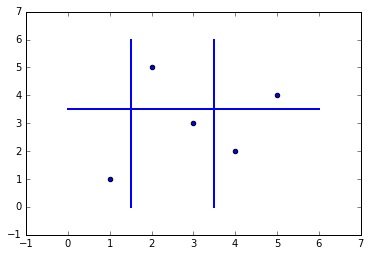

In [146]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot(points,graph,x_lines,y_lines):
    plt.scatter(*zip(*points))
    axes = plt.gca()
    #plot lines drawn
    for line in x_lines:
        plt.plot([line, line],[0,6], color='b', linestyle='-',linewidth=2)
    for line in y_lines:
        plt.plot([0,6],[line,line], color='b', linestyle='-', linewidth=2)
    #plot remaining
    for point in graph.keys():
        for p2 in graph[point]:
            plt.plot([point[0], p2[0]], [point[1], p2[1]], linestyle='-', linewidth=2)
    plt.show()
    
plot(points,graph,x_lines,y_lines)

In [118]:
for x in get_permutations([(1,0),(2,2),(3,2)]):
    print(x)

((1, 0), (2, 2), (3, 2))
((1, 0), (3, 2), (2, 2))
((2, 2), (1, 0), (3, 2))
((2, 2), (3, 2), (1, 0))
((3, 2), (1, 0), (2, 2))
((3, 2), (2, 2), (1, 0))
